Bài tập

Cho dữ liệu gồm 100 hàng, gồm chiều rộng, chiều dài và giá của một ngôi nhà, hay xây dựng một mô hình dư đoán giá nhà dựa vào chiều dài và rộng với giả thuyết

$$ \text{giá} = a * \text{rộng} + b* \text{dài} + c , a, b, c \in \mathbb{R}$$

Dùng Gradient Descent giải Linear Regression cho bài toán này
khởi tạo tham số, chỉnh số vòng lặp và learning rate cho phù hợp
Hint: để GD dễ hội tụ hơn nên Normalization input trước
So sánh kết quả (MSE) với Exact Solution và kết quả từ Sklearn

Nộp bài

Code và chạy kết quả lưu vào file notebook NMMH_TH2_MSSV.ipynb (notebook phải có kết quả chạy nếu ko xem như chưa làm)

Nén thành file NMMH_TH2_MSSV.ipynb và nộp về: huynhthanh98vn@gmail.com, với tiêu đề NMMH_TH2_MSSV

Deadline: 23g59 thứ 3 ngày 23/04/2022. Nộp trễ bị chia đôi số điểm.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Import Data
df = pd.read_csv('/content/gdrive/MyDrive/House_Price_2.csv')
df.head()

,width,length,price
0,28,97,3.350184e+08
1,21,62,2.298295e+08
2,27,64,2.603552e+08
3,5,92,2.064708e+08
4,13,84,2.339808e+08


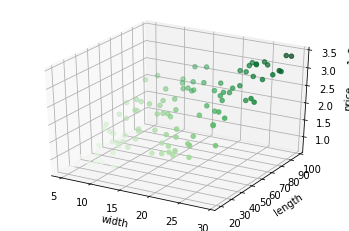

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('width')
ax.set_ylabel('length')
ax.set_zlabel('price');
ax.scatter3D(df['width'], df['length'], df['price'], c=df['price'], cmap='Greens');

Chúng ta sẽ dữ dụng mô hình hồi quy bội để xây dựng mô hình tuyến tính

X1  = ['width']

X2  = ['length']

y  = giá tiền (chưa biết, muốn dự đoán)

Ta giả thiết:  $\hat{y}=$𝛽1$X1 + $𝛽2$X2 + $𝛽3   

với   $𝛽1$, $𝛽2$, $𝛽3$  là số thực

Ta tìm  $𝛽1$, $𝛽2$, $𝛽3$  sao cho trung bình bình phương sai số nhỏ nhất khi đoán, tức là tìm $𝛽1$, $𝛽2$, $𝛽3$  sao cho

$$ \frac{1}{n} \sum (y-\hat{y})^2 = \frac{1}{n} \sum (y − 𝛽1X1 - 𝛽2X2 - 𝛽3)^2 $$

đạt giá trị nhỏ nhất, với  n  là số mẫu.

Đặt $\alpha$ là learning rate, giá trị $a$ và $b$ sẽ được cập nhật theo công thức:

- $𝛽1 = 𝛽1 - \alpha \frac{\partial L}{\partial 𝛽1} = 𝛽1 - \alpha \frac{\partial}{\partial 𝛽1} \left( \frac{1}{n} \sum (y − 𝛽1X1 - 𝛽2X2 - 𝛽3)^2 \right)
= 𝛽1 - 2 \alpha  \frac{1}{n} \sum (y − 𝛽1X1 - 𝛽2X2 - 𝛽3) (-X1) $

- $𝛽2 = 𝛽2 - \alpha \frac{\partial L}{\partial 𝛽2} = 𝛽2 - \alpha \frac{\partial}{\partial 𝛽2} \left( \frac{1}{n} \sum (y − 𝛽1X1 - 𝛽2X2 - 𝛽3)^2 \right)
= 𝛽2 - 2 \alpha  \frac{1}{n} \sum (y − 𝛽1X1 - 𝛽2X2 - 𝛽3) (-X2) $

- $𝛽3 = 𝛽3 - \alpha \frac{\partial L}{\partial 𝛽3} = 𝛽3 - \alpha \frac{\partial}{\partial 𝛽3} \left( \frac{1}{n} \sum (y − 𝛽1X1 - 𝛽2X2 - 𝛽3)^2 \right)
= 𝛽3 - 2 \alpha  \frac{1}{n} \sum (y − 𝛽1X1 - 𝛽2X2 - 𝛽3) (-1) $

Với  X ,  y  là các ma trận với mỗi hàng là một sample,  X  là data và  y  là target. Gọi  Z  là mận trận mở rộng của  X  nhưng có thêm một cột toàn số 1.
Khi đó bài toán Linear Regression có thể code thành
```python
𝛽1 = 𝛽1 - alpha * 2 *np.mean((y − 𝛽1X1 - 𝛽2X2 - 𝛽3)*(-X1))
𝛽2 = 𝛽2 - alpha * 2 *np.mean((y − 𝛽1X1 - 𝛽2X2 - 𝛽3)*(-X2))
𝛽3 = 𝛽3 - alpha * 2 *np.mean((y − 𝛽1X1 - 𝛽2X2 - 𝛽3)*(-1))
```

In [10]:
#Tách X 'length'
X1 = df['width']
X2 = df['length']
#Tách Y
Y = df['price']


(100,)
(100,)


In [11]:
X1 = np.array(X1).reshape((len(X1),1))
X2 = np.array(X2).reshape((len(X2),1))
Y = np.array(Y).reshape((len(Y),1))
print(X1.shape)
print(X2.shape)
print(Y.shape)

(100, 1)
(100, 1)
(100, 1)


In [14]:
#init 𝛽1, 𝛽2, 𝛽3
beta1, beta2, beta3 = 1,1,100

## số vòng lặp cập nhật 𝛽1, 𝛽2, 𝛽3
n_iter = 10000
## learning rate           
alpha = 0.0000001          
for ii in range(n_iter):
    Err = Y - beta1*X1-beta2*X2 - beta3
    beta1 = beta1 - 2* alpha * np.mean(Err*(-X1))
    beta2 = beta2 - 2* alpha * np.mean(Err*(-X2))
    beta3 = beta3 - 2* alpha * np.mean(Err*(-1))
    if ii % 1000 == 0:
        loss = np.mean(np.square(Y - beta1*X1-beta2*X2 - beta3))
        print("Loss at iter {}: {}".format(ii, loss))
loss = np.mean(np.square(Y - beta1*X1-beta2*X2 - beta3))
print("Final loss: ", loss)
print("Hàm số: y = {}*X1 +{}*X2+{}".format(beta1,beta2,beta3))

Loss at iter 0: 4.591375921103402e+16
Loss at iter 1000: 9004461380960406.0
Loss at iter 2000: 2533089969347674.5
Loss at iter 3000: 1378425448087317.0
Loss at iter 4000: 1152963600237857.5
Loss at iter 5000: 1090399122220621.1
Loss at iter 6000: 1056879136940735.0
Loss at iter 7000: 1029010664871436.6
Loss at iter 8000: 1002693231106176.8
Loss at iter 9000: 977196227857165.1
Final loss:  952402468223526.4
Hàm số: y = 1319081.5835299455*X1 +2966082.321914994*X2+56366.18505349111


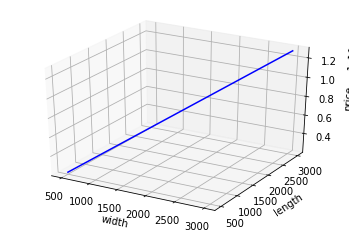

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('width')
ax.set_ylabel('length')
ax.set_zlabel('price');
#ax.scatter3D(df['width'], df['length'], df['price'], c=df['price'], cmap='Greens');
x1_map = np.arange(500, 3000)
x2_map = np.arange(500, 3000)
y_map = beta1*x1_map+beta2*x2_map+beta3
ax.plot3D(x1_map, x2_map, y_map, 'blue')

In [16]:
## SkLearn
X = df[['width','length']]
one = np.ones((len(X),1))
Z = np.append(one, X, axis=1)
Z = Z.astype(np.float64)       

In [19]:
from sklearn.linear_model import LinearRegression
#LinearRegression
lr = LinearRegression().fit(X, Y)    
#𝛽1, 𝛽2, 𝛽3
sk_beta1, sk_beta2, sk_beta3= lr.coef_[0][0],lr.coef_[0][1], lr.intercept_[0]
print("𝛽1 = {}, 𝛽2 = {}, 𝛽3 {}".format(sk_beta1, sk_beta2,sk_beta3))

𝛽1 = 4992438.834851159, 𝛽2 = 1997577.097227781,𝛽3 844994.8258749545


In [21]:
#Tách X
X = df[['width','length']]
one = np.ones((len(X),1))
Z = np.append(one, X, axis=1)
Z = Z.astype(np.float64)       

beta = np.matmul(np.matmul(np.linalg.inv(np.matmul(Z.T,Z)), Z.T), Y)
#print(beta)
print("𝛽1 = {}; 𝛽2 = {}; 𝛽3 = {}".format(beta[0][0],beta[1][0],beta[2][0]))

𝛽1 = 844994.8258758411; 𝛽2 = 4992438.834851142; 𝛽3 = 1997577.0972277774


In [22]:
print("GD MSE: ", np.mean(np.square(Y - beta1*X1-beta2*X2 - beta3)))
print("Exact SOl MSE: ", np.mean(np.square(Y - beta[0][0]*X1-beta[1][0]*X2 - beta[2][0])))
print("SK MSE: ", np.mean(np.square(Y - sk_beta1*X1-sk_beta2*X2 - sk_beta3)))

GD MSE:  952402468223526.4
Exact SOl MSE:  1.6688948482859192e+16
SK MSE:  8629315550589.735


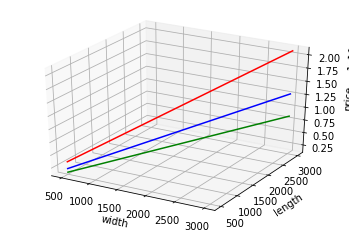

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('width')
ax.set_ylabel('length')
ax.set_zlabel('price');
#ax.scatter3D(df['width'], df['length'], df['price'], c=df['price'], cmap='Greens');
x1_map = np.arange(500, 3000)
x2_map = np.arange(500, 3000)
y_gd = beta1*x1_map + beta2*x2_map + beta3
y_sk = sk_beta1*x1_map + sk_beta2*x2_map + sk_beta3
y_e = beta[0][0]*x1_map + beta[2][0]*x2_map + beta[2][0]
ax.plot3D(x1_map, x2_map, y_map, 'blue')
ax.plot3D(x1_map, x2_map, y_sk, 'red')
ax.plot3D(x1_map, x2_map, y_e, 'green')